# 1. 

In [1]:
import boto3
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

## Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'ryan-greiner-bucket'
bucket = s3.Bucket(bucket_name)

## Defining the file to be read from s3 bucket
file_key = 'College.csv'
bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading CSV file
college = pd.read_csv(file_content_stream)
college.head()

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


# Input and Target Variables

In [2]:
college['Private'] = np.where(college['Private'] == 'Yes', 1, 0 )
X = college[['Private', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'S.F.Ratio', 'Grad.Rate']]
Y = college['Apps']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Linear Regression Model

In [3]:
lm = LinearRegression().fit(X_train, Y_train)
lm_pred = lm.predict(X_test)
lm_mse = np.mean(np.power(Y_test - lm_pred, 2))
print('The MSE of the linear regression model is', lm_mse)

The MSE of the linear regression model is 9120766.058161397


# Ridge Regression Model

In [4]:
ridge_cv = RidgeCV(alphas = np.linspace(0.001,100, num = 100), normalize = True, cv = 5).fit(X_train, Y_train)

ridge_md = Ridge(alpha = ridge_cv.alpha_).fit(X_train, Y_train)
ridge_pred = ridge_md.predict(X_test)

ridge_mse = np.mean(np.power(Y_test - ridge_pred, 2))

print('The ideal value for lambda is', ridge_cv.alpha_)
print('The MSE of the ridge model is', ridge_mse)

The ideal value for lambda is 0.001
The MSE of the ridge model is 9121046.463164926


# Lasso Regression Model

In [5]:
lasso_cv = LassoCV(alphas = np.linspace(0.001,100, num = 100), normalize = True, cv = 5).fit(X_train, Y_train)

lasso_md = Lasso(alpha = lasso_cv.alpha_, normalize = True).fit(X_train, Y_train)
lasso_pred = lasso_md.predict(X_test)

lasso_mse = np.mean(np.power(Y_test - lasso_pred, 2))

print('The ideal value for lambda is', lasso_cv.alpha_)
print('The MSE of the lasso model is', lasso_mse)

The ideal value for lambda is 1.011090909090909
The MSE of the lasso model is 9079095.023683485


In [ ]:
# Based on the results of the three models above, the best model to predict applications is the Lasso Model since it has the lowest MSE

# 2. 

In [6]:
## Defining the file to be read from s3 bucket
file_key80 = 'churn-bigml-80.csv'
bucket_object80 = bucket.Object(file_key80)
file_object80 = bucket_object80.get()
file_content_stream80 = file_object80.get('Body')

file_key20 = 'churn-bigml-20.csv'
bucket_object20 = bucket.Object(file_key20)
file_object20 = bucket_object20.get()
file_content_stream20 = file_object20.get('Body')

## Reading CSV file
telecom_train = pd.read_csv(file_content_stream80)
telecom_test = pd.read_csv(file_content_stream20)
telecom_train.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
telecom_train['Churn'].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

In [8]:
telecom_train['Churn'] = np.where(telecom_train['Churn'] == True, 1, 0)
telecom_test['Churn'] = np.where(telecom_test['Churn'] == True, 1, 0)

telecom_train['International_plan'] = np.where(telecom_train['International_plan'] == 'Yes', 1, 0)
telecom_test['International_plan'] = np.where(telecom_test['International_plan'] == 'Yes', 1, 0)

telecom_train['Voice_mail_plan'] = np.where(telecom_train['Voice_mail_plan'] == 'Yes', 1, 0)
telecom_test['Voice_mail_plan'] = np.where(telecom_test['Voice_mail_plan'] == 'Yes', 1, 0)

telecom_train['total_charge'] = telecom_train['Total_day_charge'] + telecom_train['Total_eve_charge'] + telecom_train['Total_night_charge'] + telecom_train['Total_intl_charge']
telecom_test['total_charge'] = telecom_test['Total_day_charge'] + telecom_test['Total_eve_charge'] + telecom_test['Total_night_charge'] + telecom_test['Total_intl_charge']

telecom_train = telecom_train[['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls', 'Churn']]
telecom_test = telecom_test[['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls', 'Churn']]

telecom_train.head()

,Account_length,International_plan,Voice_mail_plan,total_charge,Customer_service_calls,Churn
0,128,0,1,75.56,1,0
1,107,0,1,59.24,1,0
2,137,0,0,62.29,0,0
3,84,1,0,66.80,2,0
4,75,1,0,52.09,3,0


In [9]:
X = telecom_train[['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls']]
Y = telecom_train['Churn']
coef = list()

In [10]:
for i in range (0, 1000):
    X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    lasso_cv = LassoCV(normalize = True, cv = 5).fit(X_train, Y_train) # max_iter = 100000, tol=.01
    lasso_md = Lasso(alpha = lasso_cv.alpha_, normalize = True).fit(X_train, Y_train)
    coef.append(lasso_md.coef_)

In [11]:
coef_data = pd.DataFrame(coef)
coef_data.head()

,0,1,2,3,4
0,0.000000,0.315908,-0.067568,0.467117,0.496302
1,0.007138,0.293858,-0.079879,0.511028,0.535410
2,0.040298,0.311742,-0.078397,0.541118,0.490772
3,0.004524,0.338279,-0.068111,0.435610,0.562101
4,0.011481,0.304661,-0.072086,0.510860,0.542663


In [12]:
sum(coef_data[0] == 0)

246

In [ ]:
# Based on the results, remove the variable Account_length #

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression

X = telecom_train[['International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls']]
Y = telecom_train['Churn']

md1_results = list()
md2_results = list()
md3_results = list()
md4_results = list()

for i in range(0, 100):
    kfold = StratifiedKFold(n_splits = 5, shuffle = True)
    
    md1_fold = list()
    md2_fold = list()
    md3_fold = list()
    md4_fold = list()
    
    for train_ix, test_ix in kfold.split(X, Y):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
        
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)
        
        mdL = LogisticRegression().fit(X_train, Y_train)
        md1 = LogisticRegression(solver = 'liblinear', penalty = 'l1').fit(X_train, Y_train)
        md2 = LogisticRegression(solver = 'liblinear', penalty = 'l2').fit(X_train, Y_train)
        md3 = LogisticRegression(solver = 'saga', penalty = 'l1').fit(X_train, Y_train)
        md4 = LogisticRegression(solver = 'saga', penalty = 'l2').fit(X_train, Y_train)
        
        md1_pred = md1.predict_proba(X_test)[:, 1]
        md2_pred = md2.predict_proba(X_test)[:, 1]
        md3_pred = md3.predict_proba(X_test)[:, 1]
        md4_pred = md4.predict_proba(X_test)[:, 1]
        
        md1_label = np.where(md1_pred < .1, 0, 1)
        md2_label = np.where(md2_pred < .1, 0, 1)
        md3_label = np.where(md3_pred < .1, 0, 1)
        md4_label = np.where(md4_pred < .1, 0, 1)
        
        md1_fold.append(recall_score(Y_test, md1_label))
        md2_fold.append(recall_score(Y_test, md2_label))
        md3_fold.append(recall_score(Y_test, md3_label))
        md4_fold.append(recall_score(Y_test, md4_label))
        
    md1_results.append(md1_fold)
    md2_results.append(md2_fold)
    md3_results.append(md3_fold)
    md4_results.append(md4_fold)

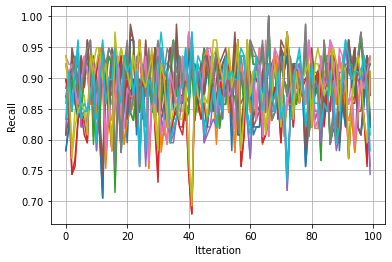

In [14]:
import matplotlib.pyplot as plt

plt.plot(md1_results)
plt.plot(md2_results)
plt.plot(md3_results)
plt.plot(md4_results)
plt.xlabel('Itteration')
plt.ylabel('Recall')
plt.grid()
plt.show();

In [15]:
print('The mean recall of model 1 is,', np.mean(md1_results))
print('The mean recall of model 2 is,', np.mean(md2_results))
print('The mean recall of model 3 is,', np.mean(md3_results))
print('The mean recall of model 4 is,', np.mean(md4_results))

The mean recall of model 1 is, 0.8751844821844823
The mean recall of model 2 is, 0.8968737928737929
The mean recall of model 3 is, 0.872092574092574
The mean recall of model 4 is, 0.8861861471861472


In [ ]:
# Both the liblinear and saga models preformed best with the l2 penalty #

In [16]:
X_train = telecom_train[['International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls']]
Y_train = telecom_train['Churn']
X_test = telecom_test[['International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls']]
Y_test = telecom_test['Churn']

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
final_md1 = LogisticRegression(solver = 'liblinear', penalty = 'l2').fit(X_train, Y_train)
final_md2 = LogisticRegression(solver = 'saga', penalty = 'l2').fit(X_train, Y_train)

md1_pred = md1.predict_proba(X_test)[:, 1]
md2_pred = md2.predict_proba(X_test)[:, 1]
        
md1_label = np.where(md1_pred < .1, 0, 1)
md2_label = np.where(md2_pred < .1, 0, 1)

print('The recall of the liblinear model is,', recall_score(Y_test, md1_label))
print('The recall of the saga model is,', recall_score(Y_test, md2_label))

The recall of the liblinear model is, 0.8947368421052632
The recall of the saga model is, 0.9052631578947369


In [ ]:
# The best model for predicting churn is the saga model with l2 penalty #